<a href="https://colab.research.google.com/github/Musab0/AI-Product-Management-Specialization/blob/main/Course1_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple Linear Regression 

**1.	Modeling approach** - did you correctly identify the type of 

modeling task, features to use, and possible algorithms to use?
Based on the type of data at hand, a regression model is needed to achieve the task of prediciting PE based on the values of the features. 

All features provided will be used as inputs to the model, as having more features is better than having less even if some of the features are not affecting the prediction value by much. 



---


**2.	Model building -** did you compare at least two different models (different algorithms, different combinations of features, or different hyperparameter combinations) using a vlidation set or cross-validation to optimize your model?

---
**3.	Model evaluation -** did you set a reasonable evaluation metric to determine the performance of your model, and then calculate it on the test set?

---

**4.	Model interpretation -** did you correctly interpret and clearly communicate the performance of your model?

## Examining the Data 

In [87]:
import pandas as pd
# Reading csv file 
url  = "https://storage.googleapis.com/aipi_datasets/CCPP_data.csv"
df = pd.read_csv(url)

In [88]:
# Display the first 5 rows
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [78]:
# Display the last 5 rows
df.tail()

,AT,V,AP,RH,PE
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74
9567,21.60,62.52,1017.23,67.87,453.28



In this notebook, we'll build a linear regression model to predict 'Sales' using 'TV' as the predictor variable.


In [79]:
# Let's check the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [53]:
# Check the shape of the DataFrame (rows, columns)
df.shape

(9568, 5)

In [54]:
# Let's look at some statistical information about the dataframe.
df.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


## Visualising Data 

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='PE', ylabel='AT'>

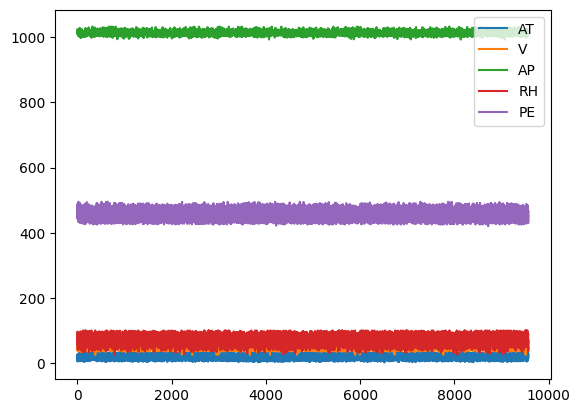

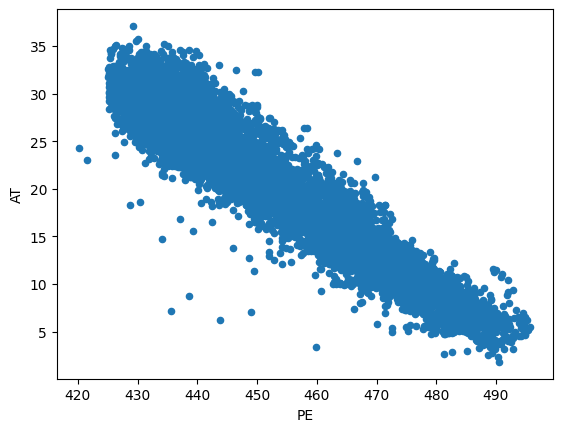

In [89]:
# Visualise the relationship between the features and the response using scatterplots
# ['AT',	'V',	'AP',	'RH',	'PE']
df.plot()
df.plot(x='PE',y='AT',kind='scatter')

## Data Preparation and Spliting 
-  The scikit-learn library expects X (feature variable) and y (response variable) to be NumPy arrays.
-  However, X can be a dataframe as Pandas is built over NumPy.

In [90]:
# Putting feature variable to X
X = df[['AT',	'V',	'AP',	'RH']]
# Print the first 5 rows
X.head()

,AT,V,AP,RH
0,14.96,41.76,1024.07,73.17
1,25.18,62.96,1020.04,59.08
2,5.11,39.40,1012.16,92.14
3,20.86,57.32,1010.24,76.64
4,10.82,37.50,1009.23,96.62


In [91]:
# Putting response variable to y
y = df['PE']
# Print the first 5 rows
y.head()

0    463.26
1    444.37
2    488.56
3    446.48
4    473.90
Name: PE, dtype: float64

In [92]:
#random_state is the seed used by the random number generator, it can be any integer.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2

In [59]:
print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_test))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [93]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(X_val.shape)
print(y_val.shape)

(5740, 4)
(5740,)
(1914, 4)
(1914,)
(1914, 4)
(1914,)


# Model Training 

## Performing Linear Regression

In [85]:
# import LinearRegression from sklearn
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression

# Representing LinearRegression as lr(Creating LinearRegression Object)
lr = LinearRegression()

# Fit the model using lr.fit()
lr.fit(X_train, y_train)

y_pred1 = lr.predict(X_val)
print('mean square error: %.10f' % mean_absolute_percentage_error(y_val, y_pred1))

mean square error: 0.0079610857


In [86]:
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
# Always scale the input. The most convenient way is to use a pipeline.
reg = make_pipeline(StandardScaler(),SGDRegressor(max_iter=1000, tol=1e-3))
reg.fit(X_train, y_train)

y_pred2 = reg.predict(X_val)

print('Accuracy: %.10f' % mean_absolute_percentage_error(y_val, y_pred2))

Accuracy: 0.0079598795


# Testing

mean_absolute_percentage_error: 0.00807


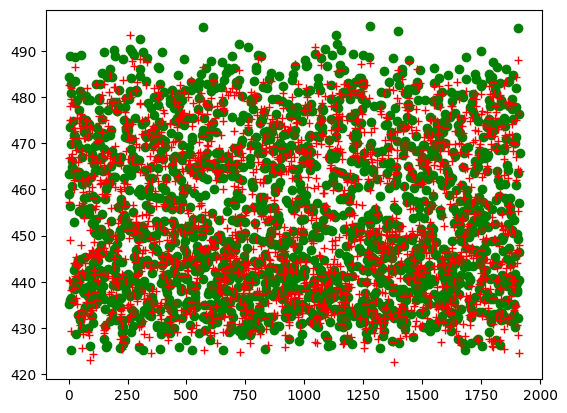

In [94]:
# Making predictions on the testing set
y_pred = lr.predict(X_test)

print('mean_absolute_percentage_error: %.5f' % mean_absolute_percentage_error(y_test, y_pred))

import matplotlib.pyplot as plt
plt.plot(y_test.to_numpy(),'go')
plt.plot(y_pred,'r+')